In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()

# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)

9920512it [00:02, 4538348.90it/s]          


Extracting /tmp/mnist\MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 287298.99it/s]           


Extracting /tmp/mnist\MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:00, 3997039.45it/s]          


Extracting /tmp/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 61091.80it/s]            
C:\Users\jmpar\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


Extracting /tmp/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


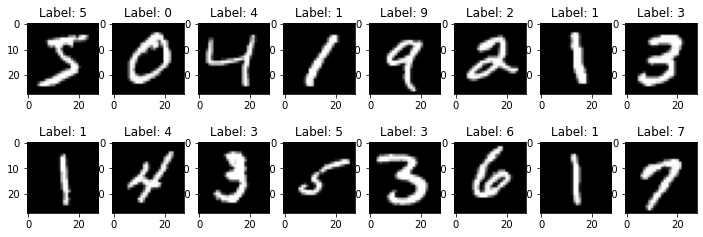

In [4]:
# Plot some digits.

cols = 8
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training[i]          # returns PIL image with its labels
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray')  # we get a 1x28x28 tensor -> remove first dimension
plt.show()

In [6]:
# Create a simple neural network with one hidden layer with 256 neurons.
model = torch.nn.Sequential(
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

# Use Adam as optimizer.
opt = torch.optim.Adam(params=model.parameters(), lr=0.01)

# Use CrossEntropyLoss for as loss function.
loss_fn = torch.nn.CrossEntropyLoss()

# We train the model with batches of 500 examples.
batch_size = 500
train_loader = torch.utils.data.DataLoader(mnist_training, batch_size=batch_size, shuffle=True)
# Training of the model. We use 10 epochs.
losses = []

for epoch in range(10):
    for imgs, labels in train_loader:
        n = len(imgs)
        # Reshape data from [500, 1, 28, 28] to [500, 784] and use the model to make predictions.
        predictions = model(imgs.view(n, -1))  
        # Compute the loss.
        loss = loss_fn(predictions, labels) 
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Epoch: {epoch}, Loss: {float(loss)}")

Epoch: 0, Loss: 0.11684270203113556
Epoch: 1, Loss: 0.09766534715890884
Epoch: 2, Loss: 0.07638625800609589
Epoch: 3, Loss: 0.06076809763908386
Epoch: 4, Loss: 0.0772227942943573
Epoch: 5, Loss: 0.040690477937459946
Epoch: 6, Loss: 0.02557595632970333
Epoch: 7, Loss: 0.018776100128889084
Epoch: 8, Loss: 0.01724373921751976
Epoch: 9, Loss: 0.020956337451934814


In [7]:
# Determine the accuracy of our clasifier
# =======================================

# Load all 10000 images from the validation set.
n = 10000
loader = torch.utils.data.DataLoader(mnist_val, batch_size=n)
images, labels = iter(loader).next()

# The tensor images has the shape [10000, 1, 28, 28]. Reshape the tensor to
# [10000, 784] as our model expected a flat vector.
data = images.view(n, -1)

# Use our model to compute the class scores for all images. The result is a
# tensor with shape [10000, 10]. Row i stores the scores for image images[i].
# Column j stores the score for class j.
predictions = model(data)

# For each row determine the column index with the maximum score. This is the
# predicted class.
predicted_classes = torch.argmax(predictions, dim=1)

# Accuracy = number of correctly classified images divided by the total number
# of classified images.
sum(predicted_classes.numpy() == labels.numpy()) / n

0.9735